<h2> CS 4630 Final project </h2>

In [17]:
#Importing Libs
import requests
import os, sys
import numpy as np
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [18]:
def basicStats():
    #Start by pulling in our data from https://www.basketball-reference.com/leagues/NBA_2022_totals.html
    #start with giving it the URL
    basicURL = "https://www.basketball-reference.com/leagues/NBA_2022_totals.html"
    basicPage = urllib.request.urlopen(basicURL).read()
    basicSoup = BeautifulSoup(basicPage)

    #Next give it the table we want (might add more later on and use 2 tables but this is a start)
    basketballTable = basicSoup.find(id = "div_totals_stats")
    info = basketballTable.find_all(class_ = "full_table")
    
    basicData = pd.DataFrame(columns=["Name", "Age", "Position", "Team", "FG%","3PT%","Games", "Games Started", 'Mins played',
                                       "FG", "FGA", "FG3", "FG3A",'FG2','FG2A','FG2%','EFF%','FT','FTA','FT%','ORB','DRB','TotRB',
                                      'AST','STL','BLK','TOV','PF','Pts'])
    
    #Adding the player data from the table into the df
    for i in range(len(info)):
        basicDataDict = {
            "Name" : info[i].find("td", {"data-stat" : "player"}).text,
            "Age" : info[i].find("td", {"data-stat" : "age"}).text,
            "Position" : info[i].find("td", {"data-stat" : "pos"}).text,
            "Team" : info[i].find("td", {"data-stat" : "team_id"}).text,
            "FG%" : info[i].find("td", {"data-stat" : "fg_pct"}).text,
            "3PT%" : info[i].find("td", {"data-stat" : "fg3_pct"}).text,
            "Games" : info[i].find("td", {"data-stat" : "g"}).text,
            "Games Started" : info[i].find("td", {"data-stat" : "gs"}).text,
            "Mins played" : info[i].find("td", {"data-stat" : "mp"}).text,
            "FG" : info[i].find("td", {"data-stat" : "fg"}).text,
            "FGA" : info[i].find("td", {"data-stat" : "fga"}).text,
            "FG3" : info[i].find("td", {"data-stat" : "fg3"}).text,
            "FG3A" : info[i].find("td", {"data-stat" : "fg3a"}).text,
            "FG2" : info[i].find("td", {"data-stat" : "fg2"}).text,
            "FG2A" : info[i].find("td", {"data-stat" : "fg2a"}).text,
            "FG2%" : info[i].find("td", {"data-stat" : "fg2_pct"}).text,
            "EFF%" : info[i].find("td", {"data-stat" : "efg_pct"}).text,
            "FT" : info[i].find("td", {"data-stat" : "ft"}).text,
            "FTA" : info[i].find("td", {"data-stat" : "fta"}).text,
            "FT%" : info[i].find("td", {"data-stat" : "ft_pct"}).text,
            "ORB" : info[i].find("td", {"data-stat" : "orb"}).text,
            "DRB" : info[i].find("td", {"data-stat" : "drb"}).text,
            "TotRB" : info[i].find("td", {"data-stat" : "trb"}).text,
            "AST" : info[i].find("td", {"data-stat" : "ast"}).text,
            "STL" : info[i].find("td", {"data-stat" : "stl"}).text,
            "BLK" : info[i].find("td", {"data-stat" : "blk"}).text,
            "TOV" : info[i].find("td", {"data-stat" : "tov"}).text,
            "PF" : info[i].find("td", {"data-stat" : "pf"}).text,
            "Pts" : info[i].find("td", {"data-stat" : "pts"}).text,

        }
        basicData.loc[len(basicData)] = basicDataDict
    #Printing the whole table in    
    return basicData
    

basicTable = basicStats()
basicTable

,Name,Age,Position,Team,FG%,3PT%,Games,Games Started,Mins played,FG,...,FT%,ORB,DRB,TotRB,AST,STL,BLK,TOV,PF,Pts
0,Precious Achiuwa,22,C,TOR,.439,.359,73,28,1725,265,...,.595,146,327,473,82,37,41,84,151,664
1,Steven Adams,28,C,MEM,.547,.000,76,75,1999,210,...,.543,349,411,760,256,65,60,115,153,528
2,Bam Adebayo,24,C,MIA,.557,.000,56,56,1825,406,...,.753,137,427,564,190,80,44,148,171,1068
3,Santi Aldama,21,PF,MEM,.402,.125,32,0,360,53,...,.625,33,54,87,21,6,10,16,36,132
4,LaMarcus Aldridge,36,C,BRK,.550,.304,47,12,1050,252,...,.873,73,185,258,42,14,47,44,78,607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,Thaddeus Young,33,PF,TOT,.518,.354,52,1,845,141,...,.469,80,128,208,104,54,18,52,81,322
601,Trae Young,23,PG,ATL,.460,.382,76,76,2652,711,...,.904,50,234,284,737,72,7,303,128,2155
602,Omer Yurtseven,23,C,MIA,.526,.091,56,12,706,130,...,.623,85,209,294,49,17,20,41,84,299
603,Cody Zeller,29,C,POR,.567,.000,27,0,355,51,...,.776,50,75,125,22,8,6,19,56,140


In [39]:
def advancedStats():
    advancedURL = "https://www.basketball-reference.com/leagues/NBA_2022_advanced.html"
    advancedPage = urllib.request.urlopen(advancedURL).read()
    advancedSoup = BeautifulSoup(advancedPage)
    
    advancedTable = advancedSoup.find(id = "advanced_stats")
    advancedInfo = advancedTable.find_all(class_ = "full_table")
    
    advancedData = pd.DataFrame(columns=["Name", "Age", "Position", "Team", "Games","Minutes Played","Efficiency Rating","TS%", "3PAr", "FTr", "ORB%",
                                        "DRB%", "TRB%", "AST%", "STL%","BLK%","TOV%","USG%","OWS","DWS","WS","WS/48", "OBPM","DBPM","BPM",
                                        "VORP"])
    
    for i in range(len(advancedInfo)):
        advancedDataDict = {
            "Name" : advancedInfo[i].find("td", {"data-stat" : "player"}).text,
            "Age" : advancedInfo[i].find("td", {"data-stat" : "age"}).text,
            "Position" : advancedInfo[i].find("td", {"data-stat" : "pos"}).text,
            "Team" : advancedInfo[i].find("td", {"data-stat" : "team_id"}).text,
            "Games" : advancedInfo[i].find("td", {"data-stat" : "g"}).text,
            "Minutes Played" : advancedInfo[i].find("td", {"data-stat" : "mp"}).text,
            "Efficiency Rating" : advancedInfo[i].find("td", {"data-stat" : "per"}).text,
            "TS%" : advancedInfo[i].find("td", {"data-stat" : "ts_pct"}).text,
            "3PAr" : advancedInfo[i].find("td", {"data-stat" : "fg3a_per_fga_pct"}).text,
            "FTr" : advancedInfo[i].find("td", {"data-stat" : "fta_per_fga_pct"}).text,
            "ORB%" : advancedInfo[i].find("td", {"data-stat" : "orb_pct"}).text,
            "DRB%" : advancedInfo[i].find("td", {"data-stat" : "drb_pct"}).text,
            "TRB%" : advancedInfo[i].find("td", {"data-stat" : "trb_pct"}).text,
            "AST%" : advancedInfo[i].find("td", {"data-stat" : "ast_pct"}).text,
            "STL%" : advancedInfo[i].find("td", {"data-stat" : "stl_pct"}).text,
            "BLK%" : advancedInfo[i].find("td", {"data-stat" : "blk_pct"}).text,
            "TOV%" : advancedInfo[i].find("td", {"data-stat" : "tov_pct"}).text,
            "USG%" : advancedInfo[i].find("td", {"data-stat" : "usg_pct"}).text,
            "OWS" : advancedInfo[i].find("td", {"data-stat" : "ows"}).text,
            "DWS" : advancedInfo[i].find("td", {"data-stat" : "dws"}).text,
            "WS" : advancedInfo[i].find("td", {"data-stat" : "ws"}).text,
            "WS/48" : advancedInfo[i].find("td", {"data-stat" : "ws_per_48"}).text,
            "OBPM" : advancedInfo[i].find("td", {"data-stat" : "obpm"}).text,
            "DBPM" : advancedInfo[i].find("td", {"data-stat" : "dbpm"}).text,
            "BPM" : advancedInfo[i].find("td", {"data-stat" : "bpm"}).text,
            "VORP" : advancedInfo[i].find("td", {"data-stat" : "vorp"}).text

        }
        advancedData.loc[len(advancedData)] = advancedDataDict
        
    return advancedData

advancedTable = advancedStats()
advancedStats()

,Name,Age,Position,Team,Games,Minutes Played,Efficiency Rating,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,22,C,TOR,73,1725,12.7,.503,.259,.217,...,11.3,18.5,0.4,2.1,2.5,.070,-2.0,-0.6,-2.6,-0.2
1,Steven Adams,28,C,MEM,76,1999,17.6,.560,.003,.518,...,19.6,12.0,3.8,3.0,6.8,.163,1.0,1.0,2.0,2.0
2,Bam Adebayo,24,C,MIA,56,1825,21.8,.608,.008,.466,...,14.4,25.0,3.6,3.5,7.2,.188,1.7,2.1,3.8,2.7
3,Santi Aldama,21,PF,MEM,32,360,10.2,.452,.364,.242,...,9.9,18.4,-0.1,0.4,0.3,.044,-4.2,-1.5,-5.7,-0.3
4,LaMarcus Aldridge,36,C,BRK,47,1050,19.6,.604,.100,.223,...,8.0,22.4,2.1,1.0,3.1,.141,1.3,-0.6,0.7,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,Thaddeus Young,33,PF,TOT,52,845,17.0,.548,.176,.180,...,15.0,17.4,0.9,1.3,2.2,.126,0.1,2.1,2.2,0.9
601,Trae Young,23,PG,ATL,76,2652,25.4,.603,.395,.358,...,14.5,34.4,9.0,1.0,10.0,.181,7.1,-2.0,5.2,4.8
602,Omer Yurtseven,23,C,MIA,56,706,17.4,.546,.045,.247,...,13.0,19.9,0.8,1.4,2.1,.145,-1.4,0.4,-1.0,0.2
603,Cody Zeller,29,C,POR,27,355,17.2,.627,.044,.544,...,14.6,15.9,0.9,0.2,1.1,.143,-1.2,-1.0,-2.1,0.0


In [21]:
def perGameStats():
    perGameURL = "https://www.basketball-reference.com/leagues/NBA_2022_per_game.html"
    perGamePage = urllib.request.urlopen(perGameURL).read()
    perGameSoup = BeautifulSoup(perGamePage)
    
    perGameTable = perGameSoup.find(id = "all_per_game_stats")
    perGameinfo = perGameTable.find_all(class_ = "full_table")
    
    perGameData = pd.DataFrame(columns=["Name", "Age", "Position", "Team", "FG%","3PT%","Games", "Games Started", 'Mins played',
                                       "FG", "FGA", "FG3", "FG3A",'FG2','FG2A','FG2%','EFG%','FT','FTA','FT%','ORB','DRB','TotRB',
                                      'AST','STL','BLK','TOV','PF','Pts'])
    
    print("all stats EXCEPT the first 8 (from names to games started) and any percentage stats are PER GAME")
    
    for i in range(len(perGameinfo)):
        perGameDataDict = {
            "Name" : perGameinfo[i].find("td", {"data-stat" : "player"}).text,
            "Age" : perGameinfo[i].find("td", {"data-stat" : "age"}).text,
            "Position" : perGameinfo[i].find("td", {"data-stat" : "pos"}).text,
            "Team" : perGameinfo[i].find("td", {"data-stat" : "team_id"}).text,
            "FG%" : perGameinfo[i].find("td", {"data-stat" : "fg_pct"}).text,
            "3PT%" : perGameinfo[i].find("td", {"data-stat" : "fg3_pct"}).text,
            "Games" : perGameinfo[i].find("td", {"data-stat" : "g"}).text,
            "Games Started" : perGameinfo[i].find("td", {"data-stat" : "gs"}).text,
            "Mins played" : perGameinfo[i].find("td", {"data-stat" : "mp_per_g"}).text,
            "FG" : perGameinfo[i].find("td", {"data-stat" : "fg_per_g"}).text,
            "FGA" : perGameinfo[i].find("td", {"data-stat" : "fga_per_g"}).text,
            "FG3" : perGameinfo[i].find("td", {"data-stat" : "fg3_per_g"}).text,
            "FG3A" : perGameinfo[i].find("td", {"data-stat" : "fg3a_per_g"}).text,
            "FG2" : perGameinfo[i].find("td", {"data-stat" : "fg2_per_g"}).text,
            "FG2A" : perGameinfo[i].find("td", {"data-stat" : "fg2a_per_g"}).text,
            "FG2%" : perGameinfo[i].find("td", {"data-stat" : "fg2_pct"}).text,
            "EFF%" : perGameinfo[i].find("td", {"data-stat" : "efg_pct"}).text,
            "FT" : perGameinfo[i].find("td", {"data-stat" : "ft_per_g"}).text,
            "FTA" : perGameinfo[i].find("td", {"data-stat" : "fta_per_g"}).text,
            "FT%" : perGameinfo[i].find("td", {"data-stat" : "ft_pct"}).text,
            "ORB" : perGameinfo[i].find("td", {"data-stat" : "orb_per_g"}).text,
            "DRB" : perGameinfo[i].find("td", {"data-stat" : "drb_per_g"}).text,
            "TotRB" : perGameinfo[i].find("td", {"data-stat" : "trb_per_g"}).text,
            "AST" : perGameinfo[i].find("td", {"data-stat" : "ast_per_g"}).text,
            "STL" : perGameinfo[i].find("td", {"data-stat" : "stl_per_g"}).text,
            "BLK" : perGameinfo[i].find("td", {"data-stat" : "blk_per_g"}).text,
            "TOV" : perGameinfo[i].find("td", {"data-stat" : "tov_per_g"}).text,
            "PF" : perGameinfo[i].find("td", {"data-stat" : "pf_per_g"}).text,
            "Pts" : perGameinfo[i].find("td", {"data-stat" : "pts_per_g"}).text,

        }
        perGameData.loc[len(perGameData)] = perGameDataDict
        
    return perGameData

perGameTable = perGameStats()

all stats EXCEPT the first 8 (from names to games started) and any percentage stats are PER GAME


<h2> Evaluation </h2>
<p> The two dataframes above show the player's basic and advanced attributes</p>

In [7]:
topFgPctPG = basicStats()

topFgPctPG.columns
my_cols = ['Name','Position','Team','FG%','Games','Mins played', 'FGA']

topFgPctPG = topFgPctPG[my_cols]

#sorts by the top FG%
topFgPctPG = topFgPctPG.sort_values(by="FG%", ascending=False) 

#Turn the Games and FGA column into an int so we can compare it to the number 50 and 250
topFgPctPG['Games'] = topFgPctPG['Games'].astype(int)
topFgPctPG['FGA'] = topFgPctPG['FGA'].astype(int)

topFgPctPG = topFgPctPG[(topFgPctPG['Position'] == 'PG') & (topFgPctPG['Games'] >= 50) & (topFgPctPG['FGA'] >= 250)]

topFgPctPG.head(10)

,Name,Position,Team,FG%,Games,Mins played,FGA
244,Jrue Holiday,PG,MIL,.501,67,2207,954
389,Ja Morant,PG,MEM,.493,57,1889,1177
437,Chris Paul,PG,PHO,.493,65,2139,736
297,Tre Jones,PG,SAS,.490,69,1148,339
357,Tyrese Maxey,PG,PHI,.485,75,2650,995
394,Monte Morris,PG,DEN,.484,75,2239,773
174,De'Aaron Fox,PG,SAC,.473,59,2083,1092
406,Raul Neto,PG,WAS,.463,70,1372,441
399,Dejounte Murray,PG,SAS,.462,68,2366,1241
183,Darius Garland,PG,CLE,.462,68,2430,1173


In [8]:
topFgPctSG = basicStats()

topFgPctSG.columns
my_cols = ['Name','Position','Team','FG%','Games','Mins played', 'FGA']

topFgPctSG = topFgPctSG[my_cols]

#sorts by the top FG%
topFgPctSG = topFgPctSG.sort_values(by="FG%", ascending=False) 

#Turn the Games and FGA column into an int so we can compare it to the number 50 and 250
topFgPctSG['Games'] = topFgPctSG['Games'].astype(int)
topFgPctSG['FGA'] = topFgPctSG['FGA'].astype(int)

topFgPctSG = topFgPctSG[(topFgPctSG['Position'] == 'SG') & (topFgPctSG['Games'] >= 50) & (topFgPctSG['FGA'] >= 250)]

topFgPctSG.head(10)

,Name,Position,Team,FG%,Games,Mins played,FGA
440,Gary Payton II,SG,GSW,.616,71,1247,344
142,Ayo Dosunmu,SG,CHI,.520,77,2110,535
312,John Konchar,SG,MEM,.515,72,1292,262
208,Josh Green,SG,DAL,.508,67,1039,256
225,Josh Hart,SG,TOT,.504,54,1791,569
79,Jalen Brunson,SG,DAL,.502,79,2524,1008
539,Matisse Thybulle,SG,PHI,.500,66,1685,300
136,Hamidou Diallo,SG,DET,.496,58,1269,526
124,Seth Curry,SG,TOT,.487,64,2135,739
323,Zach LaVine,SG,CHI,.476,67,2328,1186


In [9]:
topFgPctSF = basicStats()

topFgPctSF.columns
my_cols = ['Name','Position','Team','FG%','Games','Mins played', 'FGA']

topFgPctSF = topFgPctSF[my_cols]

#sorts by the top FG%
topFgPctSF = topFgPctSF.sort_values(by="FG%", ascending=False) 

#Turn the Games and FGA column into an int so we can compare it to the number 50 and 250
topFgPctSF['Games'] = topFgPctSF['Games'].astype(int)
topFgPctSF['FGA'] = topFgPctSF['FGA'].astype(int)

topFgPctSF = topFgPctSF[(topFgPctSF['Position'] == 'SF') & (topFgPctSF['Games'] >= 50) & (topFgPctSF['FGA'] >= 250)]

topFgPctSF.head(10)

,Name,Position,Team,FG%,Games,Mins played,FGA
206,Javonte Green,SF,CHI,.542,65,1519,325
65,Mikal Bridges,SF,PHO,.534,82,2854,858
353,Kenyon Martin Jr.,SF,HOU,.533,79,1656,523
36,Keita Bates-Diop,SF,SAS,.517,59,956,263
317,Jonathan Kuminga,SF,GSW,.513,70,1185,460
350,Caleb Martin,SF,MIA,.507,60,1372,410
71,Bruce Brown,SF,BRK,.506,72,1774,506
364,Jalen McDaniels,SF,CHO,.484,55,895,254
345,Terance Mann,SF,LAC,.484,81,2317,690
351,Cody Martin,SF,CHO,.482,71,1866,423


In [10]:
topFgPctPF = basicStats()

topFgPctPF.columns
my_cols = ['Name','Position','Team','FG%','Games','Mins played', 'FGA']

topFgPctPF = topFgPctPF[my_cols]

#sorts by the top FG%
topFgPctPF = topFgPctPF.sort_values(by="FG%", ascending=False) 

#Turn the Games and FGA column into an int so we can compare it to the number 50 and 250
topFgPctPF['Games'] = topFgPctPF['Games'].astype(int)
topFgPctPF['FGA'] = topFgPctPF['FGA'].astype(int)

topFgPctPF = topFgPctPF[(topFgPctPF['Position'] == 'PF') & (topFgPctPF['Games'] >= 50) & (topFgPctPF['FGA'] >= 250)]

topFgPctPF.head(10)

,Name,Position,Team,FG%,Games,Mins played,FGA
105,Brandon Clarke,PF,MEM,.644,64,1246,447
552,Jarred Vanderbilt,PF,MIN,.587,74,1880,361
487,Domantas Sabonis,PF,TOT,.573,62,2136,773
11,Giannis Antetokounmpo,PF,MIL,.553,67,2204,1245
543,Obi Toppin,PF,NYK,.531,72,1230,473
537,Tristan Thompson,PF,TOT,.528,57,897,267
109,John Collins,PF,ATL,.526,54,1663,644
95,Wendell Carter Jr.,PF,ORL,.525,62,1852,684
207,Jeff Green,PF,DEN,.524,75,1849,529
197,Aaron Gordon,PF,DEN,.520,75,2376,834


In [11]:
topFgPctC = basicStats()

topFgPctC.columns
my_cols = ['Name','Position','Team','FG%','Games','Mins played', 'FGA']

topFgPctC = topFgPctC[my_cols]

#sorts by the top FG%
topFgPctC = topFgPctC.sort_values(by="FG%", ascending=False) 

#Turn the Games and FGA column into an int so we can compare it to the number 50 and 250
topFgPctC['Games'] = topFgPctC['Games'].astype(int)
topFgPctC['FGA'] = topFgPctC['FGA'].astype(int)

topFgPctC = topFgPctC[(topFgPctC['Position'] == 'C') & (topFgPctC['Games'] >= 50) & (topFgPctC['FGA'] >= 250)]

topFgPctC.head(10)

,Name,Position,Team,FG%,Games,Mins played,FGA
477,Mitchell Robinson,C,NYK,.761,72,1848,343
588,Robert Williams,C,BOS,.736,61,1804,368
194,Rudy Gobert,C,UTA,.713,66,2120,508
180,Daniel Gafford,C,WAS,.693,72,1444,411
7,Jarrett Allen,C,CLE,.677,56,1809,545
456,Dwight Powell,C,DAL,.671,82,1798,401
291,Damian Jones,C,SAC,.658,56,1017,266
578,Hassan Whiteside,C,UTA,.652,65,1162,330
220,Montrezl Harrell,C,TOT,.645,71,1641,555
445,Mason Plumlee,C,CHO,.641,73,1793,320


<H3> Evaluation</H3>
<p> The reason why we seperated by postition is because Centers dominate the other postitions when it comes to efficency, this is because they tend to take shots under the basket when other postitions tend to shoot farther away from the basket </p>

In [12]:
best3ptShooters = basicStats()

best3ptShooters.columns
my_cols = ['Name','Position','Team','3PT%','Games','Mins played', 'FG3A']

best3ptShooters = best3ptShooters[my_cols]

#sort by the top 3PT%
best3ptShooters = best3ptShooters.sort_values(by='3PT%', ascending=False)

#use the same limits we've been using 
#best3ptShooters['Games'] = best3ptShooters['Games'].astype(int)
best3ptShooters['FG3A'] = best3ptShooters['FG3A'].astype(int)

#Limit our results, if we don't then only players who shot one shot will appear

best3ptShooters = best3ptShooters[best3ptShooters['FG3A'] >= 300]

best3ptShooters.head(10)

,Name,Position,Team,3PT%,Games,Mins played,FG3A
303,Luke Kennard,SG,LAC,.449,70,1919,423
27,Desmond Bane,SG,MEM,.436,76,2266,523
357,Tyrese Maxey,PG,PHI,.427,75,2650,309
280,Cameron Johnson,PF,PHO,.425,66,1730,391
124,Seth Curry,SG,TOT,.422,64,2135,374
213,Tyrese Haliburton,SG-PG,TOT,.414,77,2695,389
198,Eric Gordon,SG,HOU,.412,57,1669,301
244,Jrue Holiday,PG,MIL,.411,67,2207,321
545,Karl-Anthony Towns,C,MIN,.410,74,2476,366
520,Max Strus,SF,MIA,.410,68,1587,442


<h3> Best 3 point shooters? </h3> 
<p> the question is a bit opinionated, but the most effient player that shot over 300 shots in the regular season is Luke Kennard, if you change the number a lot of players will change. For example, Steph Curry shot 750 Three point shots, so it would make sense he would have a lower percent than the players in the table above, since he has a higher sample size. Below shows the efficent players who took 500 or more 3's </p>

In [13]:
best3ptShooters = basicStats()

best3ptShooters.columns
my_cols = ['Name','Position','Team','3PT%','Games','Mins played', 'FG3A']

best3ptShooters = best3ptShooters[my_cols]

#sort by the top 3PT%
best3ptShooters = best3ptShooters.sort_values(by='3PT%', ascending=False)

#use the same limits we've been using 
#best3ptShooters['Games'] = best3ptShooters['Games'].astype(int)
best3ptShooters['FG3A'] = best3ptShooters['FG3A'].astype(int)

#Limit our results, if we don't then only players who shot one shot will appear

best3ptShooters = best3ptShooters[best3ptShooters['FG3A'] >= 500]

best3ptShooters.head(10)

,Name,Position,Team,3PT%,Games,Mins played,FG3A
27,Desmond Bane,SG,MEM,.436,76,2266,523
378,Patty Mills,SG,BRK,.400,81,2346,568
173,Evan Fournier,SG,NYK,.389,80,2358,619
24,LaMelo Ball,PG,CHO,.389,75,2422,565
546,Gary Trent Jr.,SG,TOR,.383,70,2448,545
601,Trae Young,PG,ATL,.382,76,2652,610
125,Stephen Curry,PG,GSW,.380,64,2211,750
553,Fred VanVleet,PG,TOR,.377,65,2462,642
41,Malik Beasley,SG,MIN,.377,79,1976,637
483,Terry Rozier,SG,CHO,.374,73,2458,593


In [14]:
#comparing the most efficent 3 point shooters who started every game they played in
best3ptShootingStarters = basicStats()

best3ptShootingStarters.columns
my_cols = ['Name','Position','Team','3PT%','Games','Mins played', 'FG3A', 'Games Started']

best3ptShootingStarters = best3ptShootingStarters[my_cols]

#sort by the top 3PT%
best3ptShootingStarters = best3ptShootingStarters.sort_values(by='3PT%', ascending=False)

#use the same limits we've been using 

best3ptShootingStarters['FG3A'] = best3ptShootingStarters['FG3A'].astype(int)

#Limit our results, if we don't then only players who shot one shot will appear, also making sure 

best3ptShootingStarters = best3ptShootingStarters[(best3ptShootingStarters['FG3A'] >= 300) & 
(best3ptShootingStarters['Games Started'] == best3ptShootingStarters['Games'])]

best3ptShootingStarters.head(10)

,Name,Position,Team,3PT%,Games,Mins played,FG3A,Games Started
27,Desmond Bane,SG,MEM,.436,76,2266,523,76
124,Seth Curry,SG,TOT,.422,64,2135,374,64
213,Tyrese Haliburton,SG-PG,TOT,.414,77,2695,389,77
545,Karl-Anthony Towns,C,MIN,.410,74,2476,366,74
112,Mike Conley,PG,UTA,.408,72,2058,414,72
167,Dorian Finney-Smith,PF,DAL,.395,80,2644,435,80
30,Harrison Barnes,PF,SAC,.394,77,2587,360,77
581,Andrew Wiggins,SF,GSW,.393,73,2329,399,73
88,Kentavious Caldwell-Pope,SG,WAS,.390,77,2329,408,77
323,Zach LaVine,SG,CHI,.389,67,2328,475,67


<h3> Iron man award </h3>
<p> The iron man award can be defined as someone who has the ability to play every game or mostly every game </p>

In [15]:
ironManAward = basicStats()

ironManAward.columns
my_cols = ['Name', 'Position', 'Team', 'Games', 'Mins played']

ironManAward = ironManAward[my_cols]

ironManAward = ironManAward.sort_values(by='Games', ascending=False)

ironManAward['Games'] = ironManAward['Games'].astype(int)

ironManAward = ironManAward[ironManAward['Games'] >= 75]

ironManAward.head(20)

,Name,Position,Team,Games,Mins played
46,Saddiq Bey,SF,DET,82,2704
334,Kevon Looney,C,GSW,82,1732
19,Deni Avdija,SF,WAS,82,1984
456,Dwight Powell,C,DAL,82,1798
65,Mikal Bridges,SF,PHO,82,2854
236,Buddy Hield,SG,TOT,81,2499
84,Alec Burks,SG,NYK,81,2318
378,Patty Mills,SG,BRK,81,2346
345,Terance Mann,SF,LAC,81,2317
66,Miles Bridges,PF,CHO,80,2837


<h3> Graphs and Visuals </h3>
<p> Scatter plots and other syntheses of information </p>

In [16]:
#mins played vs field goal attempts
for team in basicTable["Team"]:
    x = basicTable["Mins played"]
    y = basicTable["FG"]

    plt.scatter()
    plt.show()
    #fig, ax = plt.subplots()
    #ax.scatter(x, y)   #, s=sizes, c=colors, vmin=0, vmax=100)

#offensive rating vs defensive rating by team

NameError: name 'plt' is not defined

<h3> Machine Learning Evaluation </h3>
<p> Experimenting with linear regression and other algorithms </p>

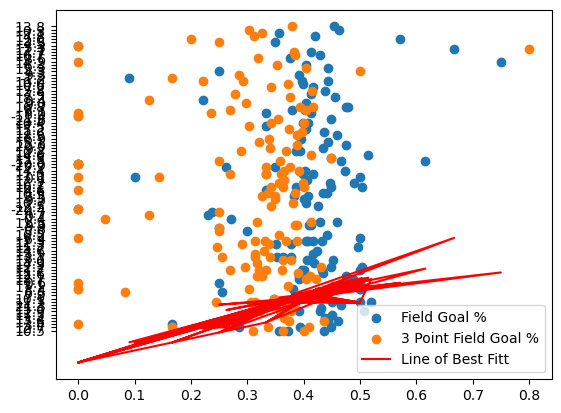

In [88]:
#Linear regression to predict shooting guard efficiency rating
sgAdvancedTable = advancedTable.loc[advancedTable['Position'] == 'SG', ['Name', 'Position', 'Efficiency Rating']]
sgPerGameTable = perGameTable.loc[perGameTable['Position'] == 'SG', ['Name', 'Pts', 'FG%', '3PT%']]

sgRegressionTable = pd.merge(sgAdvancedTable, sgPerGameTable, on='Name')

sgRegressionTable = sgRegressionTable.dropna()
mask = (sgRegressionTable['FG%'] != "") & (sgRegressionTable['Pts'] != "") & (sgRegressionTable['3PT%'] != "")
sgRegressionTable = sgRegressionTable[mask]

fg_pct = np.array(sgRegressionTable['FG%']).astype(float).reshape(-1, 1)
#pts_per_game = np.array(sgRegressionTable['Pts']).astype(float).reshape(-1, 1)
fg_pct_3pt = np.array(sgRegressionTable['3PT%']).astype(float).reshape(-1, 1)

y = np.array(sgRegressionTable['Efficiency Rating'])

x = np.concatenate((fg_pct, fg_pct_3pt), axis=1)

x

model = LinearRegression()

model.fit(x, y)

y_pred = model.predict(x)

fig, ax = plt.subplots()
ax.scatter(fg_pct, y, label="Field Goal %")
ax.scatter(fg_pct_3pt, y, label="3 Point Field Goal %")
#ax.scatter(pts_per_game, y, label="Points Per Game")
ax.plot(fg_pct, y_pred, color="red", label="Line of Best Fitt")
ax.legend()
plt.show()

#sgRegressionTable
